
# Proyek Analisis Data: Harga Lokasi AirBnB di beberapa kota Eropa
---
- Kelompok : Heapq
- Anggota : </br>
10122109 - Melvin Junod</br>
10122081 - Fajar Gustiana<br>
10122092 - Muhlas Putra Siswaji<br>
10122085 - Dyan Wiliandri<br>
10122097 - Ryan Bachtiar<br>

# Menentukan Pertanyaan Bisnis
---

1. Apa jumlah lokasi AirBnB di setiap kota (yang dicatat di data)? - Melvin Junod (10122109)
2. Apa rata-rata harga lokasi AirBnB di setiap kota? - Fajar Gustiana (10122081)
3. Apa fitur-fitur yang paling mempengaruhi kepuasan pelanggan suatu lokasi AirBnB? - Ryan Bachtiar (10122097)
4. Apa fitur-fitur yang paling mempengaruhi harga suatu lokasi AirBnB? - Dyan Wiliandri (10122085)
5. Apa pengaruh dari Room Type terhadap harga suatu lokasi AirBnB? - Muhlas Putra Siswaji (10122092)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from geopy.geocoders import Nominatim

# Data Wrangling
---

## Gathering Data

In [15]:
#Sumber data original dari https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset
data = pd.read_csv("https://raw.githubusercontent.com/melvinjunod/tubespsd/main/airbnb.csv")
data

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


## Assessing Data

In [16]:
#Memberikan summary data yang digunakan
data.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


# Cleaning Data
---

### Langkah-langkah pembersihan data yang akan dilakukan adalah:
1. Menghilangkan duplikasi data
2. Memastikan tidak ada data yang hilang
3. Menghilangkan data-data dengan harga outlier
4. Menghilangkan kolom-kolom yang tidak berarti

In [17]:
#1. Menghilangkan duplikasi data
#Di langkah ini data akan dianalisa untuk baris-baris yang mungkin terduplikasi

#Pertama kita akan mencari apakah ada baris yang terduplikasi
barisDuplikat = data[data.duplicated()]
barisDuplikat

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index


Dapat dilihat bahwa tidak ada baris yang terduplikasi di data ini. Kita dapat lanjut ke langkah berikutnya, yaitu memastikan tidak ada data yang hilang

In [18]:
#Fungsi ini akan meng-print jumlah semua data yang kosong di setiap kolom
data.isna().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

Dapat dilihat bahwa tidak ada satupun data yang hilang. Kita dapat lanjut ke langkah berikutnya, yaitu menghilangkan nilai-nilai yang tidak valid.

Dapat dilihat di bagian Assessing Data diatas (diulangi di bawah) nilai minimum dan maksimum setiap kolom. Disini dapat dilihat bahwa tidak ada satupun nilai di kolom Multiple Rooms dan Cleanliness Rating yang diluar batas yang diberikan.

In [19]:
#Agar tidak perlu scroll ke atas lagi
data.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


Oleh karena itu, kita hanya perlu untuk menganalisis apakah ada nilai yang bukan merupakan suatu bilangan bulat di kolom-kolom ini

In [20]:
kolomUntukDivalidasi = ["Multiple Rooms", "Business", "Bedrooms"]

for i in kolomUntukDivalidasi:
  #Mengreturnkan semua nilai yang bukan merupakan integer
  print(data.loc[~data[i].astype(str).str.isdigit(), i])

Series([], Name: Multiple Rooms, dtype: int64)
Series([], Name: Business, dtype: int64)
Series([], Name: Bedrooms, dtype: int64)


Karena tidak ada satupun nilai yang direturnkan, kita selanjutnya akan mengecek apakah ada lokasi-lokasi dengan harga *outlier* di data ini.

<Axes: xlabel='Price', ylabel='Count'>

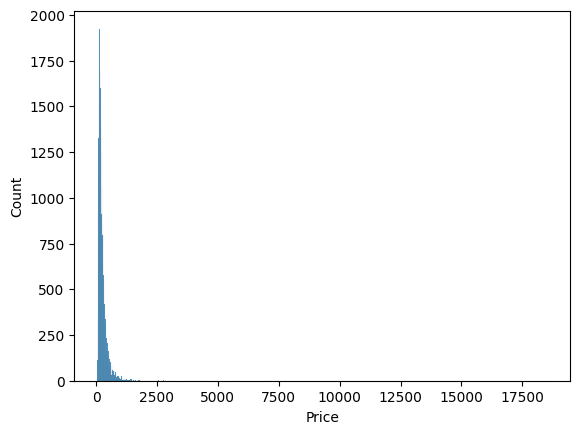

In [21]:
sns.histplot(data['Price'])

In [22]:
#Agar tidak perlu scroll ke atas lagi
data.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


Terlihat bahwa ada beberapa *outlier* harga yang jauh lebih mahal daripada rata-rata harga lokasi. Baris-baris dengan harga diatas batas tertentu sebaiknya dihilingkan. Sekarang kita akan mencoba untuk menentukan batas tersebut.

In [23]:
data['Percentile_rank'] = pd.qcut(data['Price'], 20, labels = False)
print("Semua nilai desil untuk kolom harga")
for i in range(20):
  filteredData = data[data["Percentile_rank"] == i]

  percentilePrice = filteredData["Price"].min()
  print(f"Percentile {(i)*5}: {percentilePrice}")

Semua nilai desil untuk kolom harga
Percentile 0: 34.77933919255534
Percentile 5: 92.8232363585092
Percentile 10: 109.27292381444752
Percentile 15: 122.33199739025072
Percentile 20: 133.26163701400415
Percentile 25: 144.05226300700286
Percentile 30: 155.60190284254682
Percentile 35: 167.10292605403382
Percentile 40: 178.56724392472995
Percentile 45: 190.30696934982348
Percentile 50: 203.86692539686248
Percentile 55: 218.57410881801124
Percentile 60: 233.81801125703564
Percentile 65: 251.5605639071377
Percentile 70: 272.59482069840675
Percentile 75: 297.3777329927589
Percentile 80: 330.7388448682888
Percentile 85: 376.9748527624568
Percentile 90: 452.048710936587
Percentile 95: 602.106440488396


Diasumsikan bahwa semua lokasi dengan harga diatas 603 adalah lokasi dengan harga outlier, dan akan dihilangkan. Setidaknya 95% dari dataset masih akan tersedia setelah penghilangan ini.

In [24]:
data=data.query('Price < 603')

<Axes: xlabel='Price', ylabel='Count'>

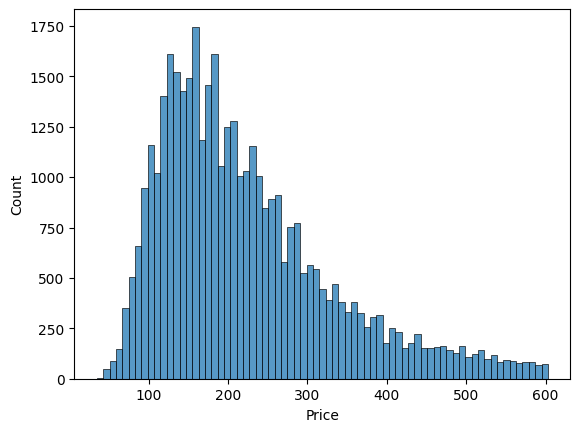

In [25]:
sns.histplot(data['Price'])

In [26]:
data.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Percentile_rank
count,39653.000000,39653.000000,39653.000000,39653.000000,39653.000000,39653.000000,39653.000000,39653.000000,39653.000000,39653.000000,39653.000000,39653.000000,39653.000000,39653.000000
mean,223.450605,3.187628,0.299372,0.341513,9.442766,93.067586,1.134240,2.697668,0.608443,287.753901,11.294964,620.922145,24.856095,9.001639
std,110.664201,1.278109,0.457989,0.474223,0.889277,8.140587,0.609626,2.006974,0.713030,234.330077,8.038119,523.613696,18.129714,5.484180
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.034661,0.002301,15.152201,0.926301,19.576924,0.592757,0.000000
25%,139.807823,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.287257,0.239281,121.808306,5.337197,204.978122,10.639456,4.000000
50%,196.611440,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.274232,0.395029,222.711838,9.622391,509.894686,21.092801,9.000000
75%,277.984901,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.605166,0.681756,381.940331,14.914860,848.489896,35.808460,14.000000
max,602.809527,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,19.000000


Setelah outlier dihilangkan, kolom **Restraunt Index** dan **Normalised Restraunt Index** akan dihilangkan; kolom-kolom ini tidak berarti dan tidak mempunyai dokumentasi. Kolom **Percentile_rank** juga tidak diperlukan lagi dan akan dihilangkan sekaligus.

In [27]:
data.drop(['Restraunt Index', "Normalised Restraunt Index", "Percentile_rank"], axis=1, inplace=True)
data.tail()

<ipython-input-27-901a5c6e3d53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Restraunt Index', "Normalised Restraunt Index", "Percentile_rank"], axis=1, inplace=True)


,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index
41704,Vienna,463.501858,Weekend,Entire home/apt,False,False,5.0,False,1,0,10.0,90.0,2,1.021878,0.285141,176.754900,12.658020
41707,Vienna,115.933899,Weekend,Private room,False,True,4.0,False,1,0,9.0,94.0,1,3.041932,0.308192,109.751387,7.859670
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803
41713,Vienna,133.230489,Weekend,Private room,False,True,4.0,True,1,0,10.0,93.0,1,1.263932,0.480903,150.450381,10.774264


In [28]:
#Menyimpan dataset di sebuah CSV untuk digunakan oleh Streamlit
data.to_csv('airbnb_processed.csv', index=False)

# Explanatory Analysis & Processing Data for Streamlit Display
---

## Pertanyaan 1:

### 1. Apa jumlah lokasi AirBnB di setiap kota (yang dicatat di data)?

In [29]:
cities = data.City.unique()
print(cities)

['Amsterdam' 'Athens' 'Barcelona' 'Berlin' 'Budapest' 'Lisbon' 'Paris'
 'Rome' 'Vienna']


In [30]:
locationsPerCity = dict()

for city in cities:
  filteredData = data[data["City"] == city]
  locationsPerCity[city] = filteredData["City"].count()

for city in locationsPerCity:
  print(f"{city} count: {locationsPerCity[city]}")

Amsterdam count: 1392
Athens count: 5259
Barcelona count: 2626
Berlin count: 2393
Budapest count: 3989
Lisbon count: 5707
Paris count: 5838
Rome count: 8955
Vienna count: 3494


Hasil analisis disimpan di dalam suatu CSV untuk digunakan di Streamlit

In [31]:
file1 = open("analysis1.csv", "w")
file1.write("City, Count\n")

for city in locationsPerCity:
  file1.write(f"{city},{locationsPerCity[city]}\n")

file1.close()

## Pertanyaan 2:


### 2. Apa rata-rata harga lokasi AirBnB di setiap kota?

In [32]:
avgPricePerCity = dict()

for city in cities:
  filteredData = data[data["City"] == city]
  if city not in avgPricePerCity.keys():
    avgPricePerCity[city] = 0.0
  for price in filteredData["Price"]:
    #print(price)
    avgPricePerCity[city] = avgPricePerCity[city] + price

for city in avgPricePerCity:
  avgPricePerCity[city] /= locationsPerCity[city]
  print(f"City {city} avg price: {avgPricePerCity[city]}")

City Amsterdam avg price: 378.0986779710236
City Athens avg price: 146.10236812083372
City Barcelona avg price: 238.38757497008177
City Berlin avg price: 216.77697966174725
City Budapest avg price: 169.01757833760843
City Lisbon avg price: 233.2431519042329
City Paris avg price: 316.35865960707457
City Rome avg price: 199.0855782195748
City Vienna avg price: 224.9642406071527


Hasil analisis disimpan di dalam suatu CSV untuk digunakan di Streamlit

In [33]:
file2 = open("analysis2.csv", "w")
file2.write("City, Avg_price\n")

for city in locationsPerCity:
  file2.write(f"{city},{avgPricePerCity[city]}\n")

file2.close()

## Pertanyaan 3:

### 3. Apa fitur-fitur yang paling mempengaruhi kepuasan pelanggan suatu lokasi AirBnB?

Pertanyaan ini akan dijawab menggunakan Random Forest Regressor. Feature engineering perlu dilakukan untuk menyiapkan dataset ini agar dapat dipelajari oleh Random Forest Regressor.

Pertama, kita akan menghilangkan kolom-kolom yang tidak penting atau kemungkinan besar termasuk dalam "**noise**", yaitu fitur-fitur yang tidak mempengaruhi data namun dapat "menjebak" komputer saat mencoba mempelajari data tersebut.  

In [34]:
X=data.drop(['Price','Shared Room','Private Room','Superhost','Attraction Index','Guest Satisfaction','City','Room Type','Day'],axis=1)
#Target dari Random Forest Regressor
y=data['Guest Satisfaction']

Mengubah data kategorikal menjadi dummy

In [35]:
X=pd.get_dummies(X)

In [36]:
X.tail()

,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index
41704,5.0,1,0,10.0,2,1.021878,0.285141,12.658020
41707,4.0,1,0,9.0,1,3.041932,0.308192,7.859670
41710,2.0,0,0,8.0,1,0.810205,0.100839,14.678608
41712,2.0,0,0,10.0,1,3.044100,0.287435,7.822803
41713,4.0,1,0,10.0,1,1.263932,0.480903,10.774264


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg1 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='friedman_mse',
                              max_depth=None, max_features='auto', max_leaf_nodes=None,
                              max_samples=None, min_impurity_decrease=0.0,
                              min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0,
                              n_estimators=200, n_jobs=-1, oob_score=False,
                              random_state=420, verbose=0, warm_start=False).fit(X_train, y_train)

print('Nilai Random Forest', reg1.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Nilai Random Forest 0.7354836859186616


Setelah model Random Forest Regressor dibuat, kita akan melihat bagaimana pentingnya setiap fitur terhadap kepuasan pelanggan menurut model tersebut

<Figure size 1000x1000 with 0 Axes>

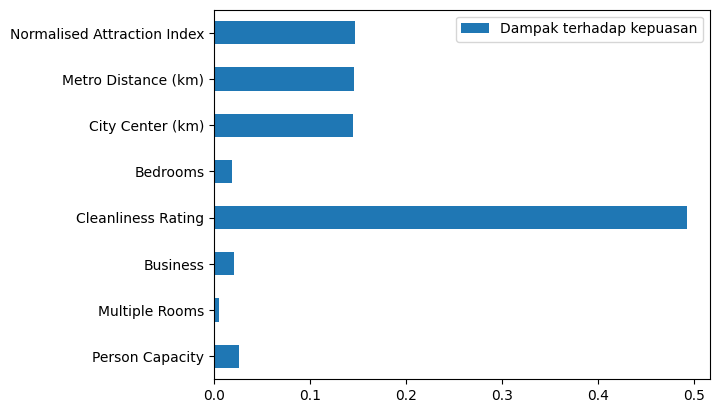

In [38]:
fti1 = pd.DataFrame(reg1.feature_importances_)
fti1.index=X.columns
fti1 = fti1.rename(columns={0: 'Dampak terhadap kepuasan'})
fti=pd.concat([fti1],axis=1)
plt.figure(figsize = (10,10))
fti.plot.barh();

Hasil ini akan disimpan ke dalam CSV untuk digunakan oleh Streamlit

In [39]:
fti1.to_csv('satisfaction_features.csv', index=True, header=None)

##Pertanyaan 4:

### 4. Apa fitur-fitur yang paling mempengaruhi harga suatu lokasi AirBnB?

Pertanyaan ini juga akan dijawab menggunakan Random Forest Regressor. Kode-kode berikut ini akan menggunakan ulang beberapa hasil dan kode yang sudah didapatkan/ditulis di jawaban untuk pertanyaan 3

In [40]:
z=data['Price']

In [41]:
X_train, X_test, z_train, z_test = train_test_split(X, z, random_state=0)
reg2 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='friedman_mse',
                              max_depth=None, max_features='auto', max_leaf_nodes=None,
                              max_samples=None, min_impurity_decrease=0.0,
                              min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0,
                              n_estimators=200, n_jobs=-1, oob_score=False,
                              random_state=420, verbose=0, warm_start=False).fit(X_train, z_train)

print('Nilai Random Forest', reg2.score(X_test,z_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Nilai Random Forest 0.6622931175308719


<Figure size 1000x1000 with 0 Axes>

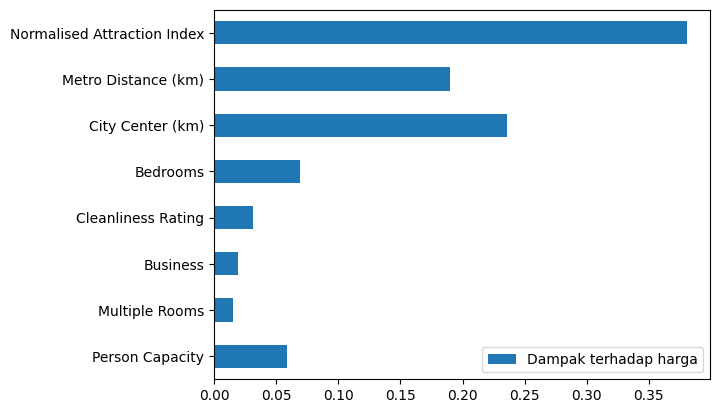

In [42]:
fti2 = pd.DataFrame(reg2.feature_importances_)
fti2.index=X.columns
fti2 = fti2.rename(columns={0: 'Dampak terhadap harga'})
fti=pd.concat([fti2],axis=1)
plt.figure(figsize = (10,10))
fti.plot.barh();

In [43]:
fti2.to_csv('price_features.csv', index=True, header=None)

##Pertanyaan 5:

### 5. Apa pengaruh dari Room Type terhadap harga suatu lokasi AirBnB

Semua ini dapat dilakukan di streamlit, ini hanya untuk *double-check*

<Axes: xlabel='Price', ylabel='Room Type'>

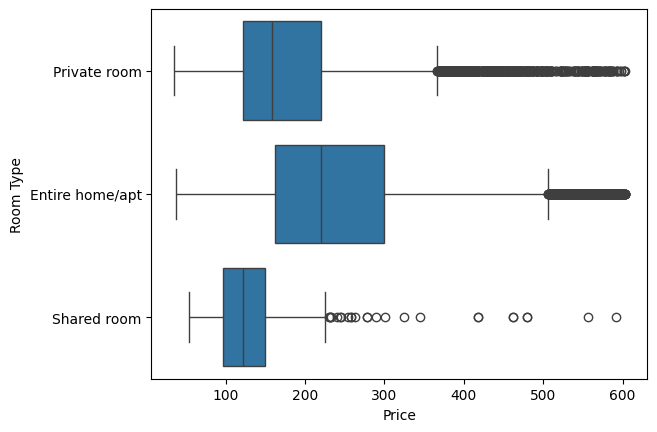

In [44]:
sns.boxplot(data,y=data['Room Type'],x=data['Price'])

# Lain-lain: geolokasi setiap kota

---
Untuk menampilkan geoanalytics, python perlu mengetahui koordinat kota-kota yang akan ditunjukkan.

Kode dibawah ini digunakan untuk mendapatkan lokasi setiap kota dan menyimpannya di dalam suatu csv

In [45]:
#Geolocator membutuhkan nama negara serta nama kota untuk dapat mencari koordinat kota di peta.
#Agar singkat, nama negara disini akan diisi secara manual.
#Daftar kota di dataset sudah didapatkan di pertanyaan bisnis 1
city_list = [
    "Amsterdam, Netherlands",
    "Athens, Greece",
    "Barcelona, Spain",
    "Berlin, German",
    "Budapest, Hungary",
    "Lisbon, Portugal",
    "Paris, France",
    "Rome, Italy",
    "Vienna, Austria"
]

geolocator = Nominatim(user_agent="city_locator")

city_data = []

for city in city_list:
    location = geolocator.geocode(city)
    if location is not None:
        just_city = city.split(",")
        print(just_city[0], location.latitude, location.longitude)
        city_data.append({
            'City': just_city[0],
            'Latitude': location.latitude,
            'Longitude': location.longitude
        })

city_df = pd.DataFrame(city_data)
city_df.to_csv('city_coordinates.csv', index=False)

Amsterdam 52.3730796 4.8924534
Athens 37.9755648 23.7348324
Barcelona 41.3828939 2.1774322
Berlin 52.5170365 13.3888599
Budapest 47.4978789 19.0402383
Lisbon 38.7077507 -9.1365919
Paris 48.8534951 2.3483915
Rome 41.8933203 12.4829321
Vienna 48.2083537 16.3725042
